<a href="https://colab.research.google.com/github/Archita0304/DeepLearning/blob/main/Modifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Creating XOR Gate using Multilayer Perceptron*

In [1]:
#1
import numpy as np

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

class MLP:
    def __init__(self):
        self.w1 = np.random.rand(2, 2)
        self.w2 = np.random.rand(2, 1)

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            hidden = sigmoid(np.dot(X, self.w1))
            output = sigmoid(np.dot(hidden, self.w2))
            output_error = y - output
            self.w2 += np.dot(hidden.T, output_error * sigmoid_derivative(output))
            hidden_error = np.dot(output_error, self.w2.T)
            self.w1 += np.dot(X.T, hidden_error * sigmoid_derivative(hidden))

    def predict(self, x):
        hidden = sigmoid(np.dot(x, self.w1))
        return sigmoid(np.dot(hidden, self.w2))


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP()
mlp.train(X, y)
print("XOR Results:")
for test in X:
    result = np.round(mlp.predict(test)[0])
    print(f"XOR({test[0]}, {test[1]}) = {int(result)}")



XOR Results:
XOR(0, 0) = 0
XOR(0, 1) = 0
XOR(1, 0) = 1
XOR(1, 1) = 0


### Using Callbacks and Batchnormalization in Deep Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:

Training with Adam Optimizer:


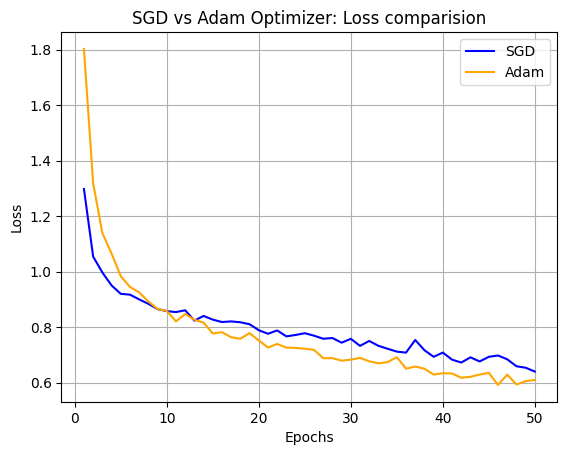

In [ ]:
#2
#modification : used callbacks function and BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.BatchNormalization(),
      layers.Dense(20,activation='relu'),
      layers.BatchNormalization(),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  stop=EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
  history=model.fit(X,y,batch_size=batch_size,epochs=epochs,verbose=0,callbacks=[stop])
  return history.history['loss']


  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=50
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss comparision')
plt.legend()
plt.grid(True)
plt.show()


### *Using Average Pooling in CNN*

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8955 - loss: 0.3409 - val_accuracy: 0.9866 - val_loss: 0.0434
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9835 - val_loss: 0.0461
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9873 - val_loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9839 - loss: 0.0483
Test Accuracy:0.9872999787330627

Test Loss:0.039702244102954865

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9915 - val_loss: 0.0288
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9935 - loss: 0.0192 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9886 - val_loss: 0.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9854 - loss: 0.0

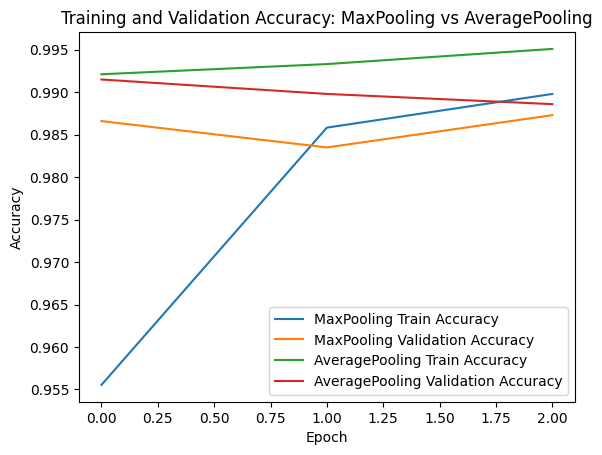

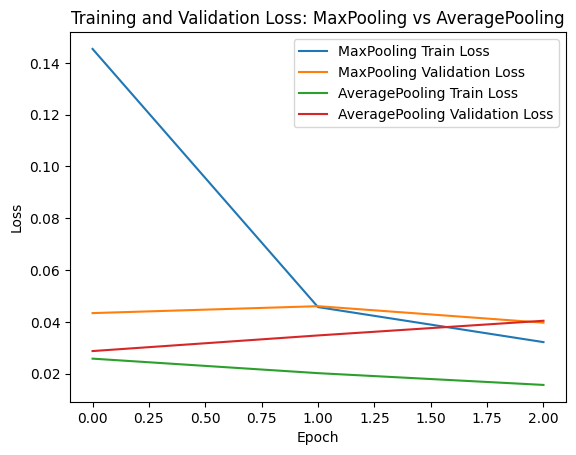

In [3]:
#3 used average pooling
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_imgs,train_labels),(test_imgs,test_labels)=datasets.mnist.load_data()
train_imgs=train_imgs.reshape((train_imgs.shape[0],28,28,1)).astype('float32')/255
test_imgs=test_imgs.reshape((test_imgs.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_max=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss,test_acc=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc}\n')
print(f'Test Loss:{test_loss}\n')


model_avg_pool = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_avg_pool.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

hist_avg=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss1,test_acc1=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc1}\n')
print(f'Test Loss:{test_loss1}\n')

plt.plot(hist_max.history['accuracy'], label='MaxPooling Train Accuracy')
plt.plot(hist_max.history['val_accuracy'], label='MaxPooling Validation Accuracy')
plt.plot(hist_avg.history['accuracy'], label='AveragePooling Train Accuracy')
plt.plot(hist_avg.history['val_accuracy'], label='AveragePooling Validation Accuracy')
plt.title('Training and Validation Accuracy: MaxPooling vs AveragePooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("\n")
plt.plot(hist_max.history['loss'], label='MaxPooling Train Loss')
plt.plot(hist_max.history['val_loss'], label='MaxPooling Validation Loss')
plt.plot(hist_avg.history['loss'], label='AveragePooling Train Loss')
plt.plot(hist_avg.history['val_loss'], label='AveragePooling Validation Loss')
plt.title('Training and Validation Loss: MaxPooling vs AveragePooling')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# ***pgrm 4***
### *Object detection using pretrained Faster RCNN model*

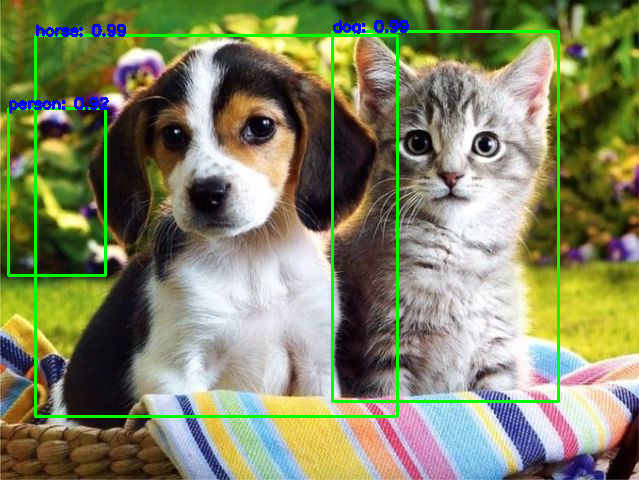

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

coco_cat_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                  'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                  'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                  'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                  'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


def detect_obj(path, threshold=0.5):
    img = cv2.imread(path)
    if img is None:
        print(f'Error: Could not load image from {path}. Please check the file path and ensure the image exists.')
        return None

    original_img = img.copy()
    img_tensor = F.to_tensor(img)
    with torch.no_grad():
        pred = model([img_tensor])

    boxes = pred[0]['boxes'].cpu().numpy()
    labels = pred[0]['labels'].cpu().numpy()
    scores = pred[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= threshold:

            label_index = labels[i]
            if 0 <= label_index < len(coco_cat_names):
                label = coco_cat_names[label_index]
            else:
                label = f"Unknown Label ({label_index})"
                print(f"Warning: Encountered unknown label index: {label_index}")

            score = scores[i]

            start = (int(box[0]), int(box[1]))
            end = (int(box[2]), int(box[3]))
            cv2.rectangle(original_img, start, end, (0, 255, 0), 2)
            cv2.putText(original_img, f"{label}: {score:.2f}", start, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_img

if __name__ == '__main__':
    path = '/content/cats-and-dogs.jpg'
    detected_image = detect_obj(path)

    if detected_image is not None:
        cv2_imshow(detected_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

### *Object detection using YOLO Model*

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 38.3 MB/s eta 0:00:00


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 512x640 1 cat, 1 dog, 404.8ms
Speed: 4.5ms preprocess, 404.8ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


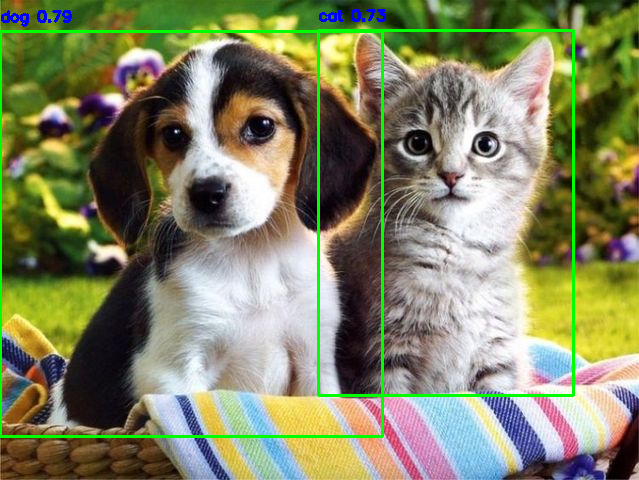

In [ ]:
# using YOLO Architecture
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('yolov5s.pt')

def detect_objects_yolo(image_path, output_path=None, conf_threshold=0.5):

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return

    results = model.predict(image, conf=conf_threshold)

    # Process results
    for result in results:
        boxes = result.boxes  # Detected boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class index
            label = result.names[cls]  # Class label

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    input_image = "/content/cats-and-dogs.jpg"
    detect_objects_yolo(input_image)


# ***pgrm 5***
### *Implementing LSTM Model on Handwritten Dataset*

In [ ]:
#LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten
from PIL import Image


(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

timesteps=x_train.shape[1]
input_dim=x_train.shape[2]

model=Sequential([
    LSTM(128,input_shape=(timesteps,input_dim),activation='elu'),
    Dense(64,activation='elu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

img_path='/content/img7.png'
img = Image.open(img_path).convert('L')
img=img.resize((28,28))
img_arr=np.array(img)/255.0
img_arr=np.reshape(img_arr,(1,28,28))

y_pred=model.predict(img_arr)
pred_class=np.argmax(y_pred)
print(f"Predicted Class:{pred_class}")



Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.6967 - loss: 0.8951 - val_accuracy: 0.9483 - val_loss: 0.1633
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9555 - loss: 0.1478 - val_accuracy: 0.9629 - val_loss: 0.1196
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9706 - loss: 0.0939 - val_accuracy: 0.9753 - val_loss: 0.0824
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9770 - loss: 0.0728 - val_accuracy: 0.9787 - val_loss: 0.0710
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9816 - loss: 0.0605 - val_accuracy: 0.9812 - val_loss: 0.0620
313/313 - 5s - 16ms/step - accuracy: 0.9790 - loss: 0.0617
Test Accuracy: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted Class:2


# **pgrm 6**
Using MultiHead Attention for Music Generation

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.0296 - loss: 3.9058 - val_accuracy: 0.0583 - val_loss: 3.8800
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0631 - loss: 3.8537 - val_accuracy: 0.0721 - val_loss: 3.7821
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.0726 - loss: 3.7249 - val_accuracy: 0.0757 - val_loss: 3.6725
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.0802 - loss: 3.6118 - val_accuracy: 0.0790 - val_loss: 3.6064
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.0839 - loss: 3.5492 - val_accuracy: 0.0850 - val_loss: 3.5647
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.0879 - loss: 3.5047 - val_accuracy: 0.0881 - val_loss: 3.5317
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0905 - loss: 3.4676 - val_accuracy: 0.0895 - val_loss: 3.5067
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.0906 - loss: 3.4472 - val_accuracy: 0.0910

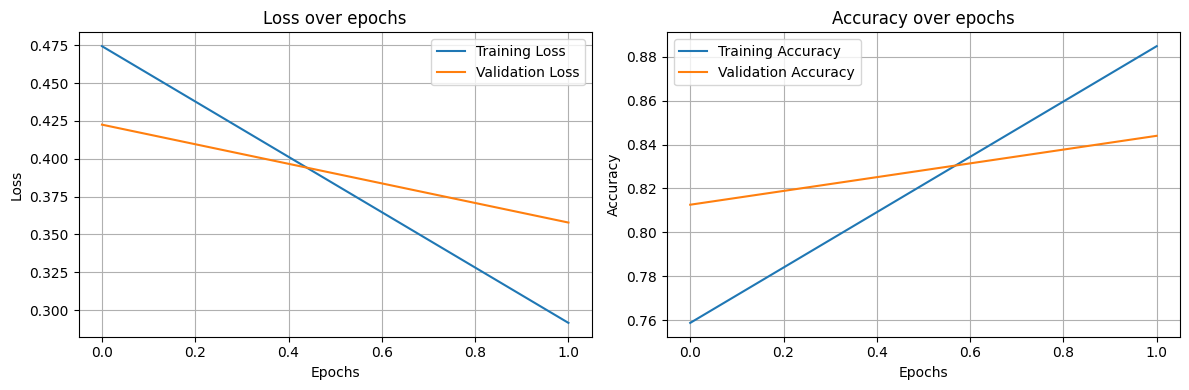

Generated music sequence: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


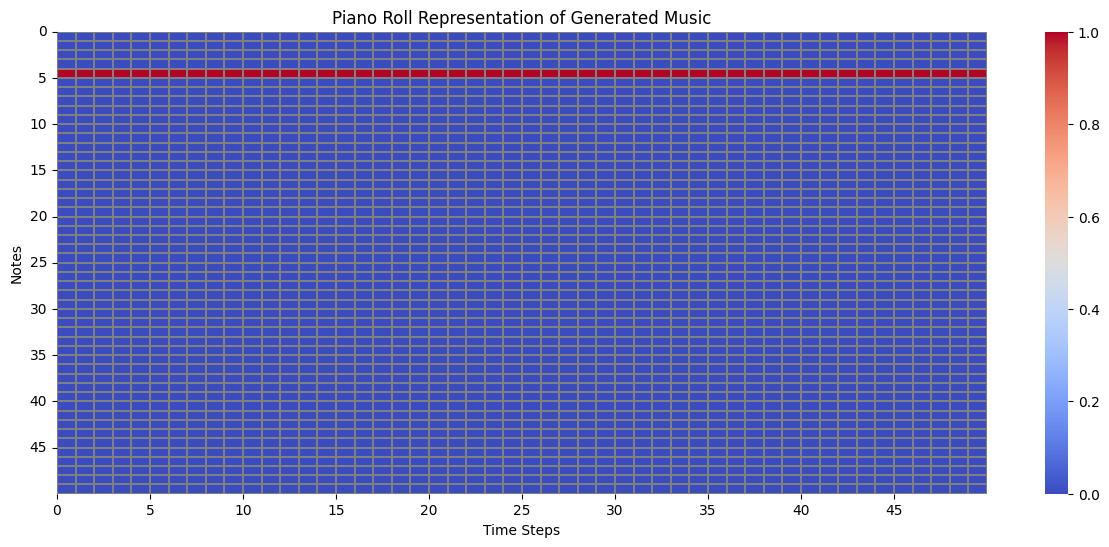

In [ ]:
#6
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

num_notes = 50
sequence_length = 30
num_sequences = 1000
embedding_dim = 128
num_heads = 4
ff_dim = 256

np.random.seed(42)
data = np.random.randint(0, num_notes, size=(num_sequences, sequence_length))
x_train = data[:, :-1]
y_train = data[:, 1:]

x_train = tf.keras.utils.to_categorical(x_train, num_classes=num_notes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_notes)

inputs = layers.Input(shape=(sequence_length - 1, num_notes))
x = layers.Dense(embedding_dim)(inputs)
x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(x, x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.RepeatVector(sequence_length - 1)(x)
x = layers.Dense(num_notes, activation="softmax")(x)

model = models.Model(inputs, x)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

def plot_hist(history):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],label='Training Loss')
  plt.plot(history.history['val_loss'],label='Validation Loss')
  plt.title('Loss over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
  plt.title('Accuracy over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid()

  plt.tight_layout()
  plt.show()

plot_hist(history)

def gen_mus(model, start, num_gen=50):
    generated = []
    curr_seq = to_categorical(start, num_classes=num_notes)
    for _ in range(num_gen):
        pred = model.predict(curr_seq, verbose=0)
        nxt = np.argmax(pred[:, -1, :], axis=-1)
        generated.append(nxt[0])
        nxt_onehot = to_categorical(nxt, num_classes=num_notes).reshape(1, 1, num_notes)
        curr_seq = np.concatenate([curr_seq[:, 1:, :], nxt_onehot], axis=1)
    return generated

start_seq = np.random.randint(0, num_notes, size=(1, sequence_length - 1))
generated_music = gen_mus(model, start_seq)

def plot_piano_roll(generated_music, num_notes):
    piano_roll = np.zeros((num_notes, len(generated_music)))
    for t, note in enumerate(generated_music):
        piano_roll[note, t] = 1

    plt.figure(figsize=(15, 6))
    sns.heatmap(
        piano_roll,
        cmap="coolwarm",
        cbar=True,
        xticklabels=10,
        yticklabels=True,
        linewidths=0.1,
        linecolor='gray'
    )
    plt.title("Piano Roll Representation of Generated Music")
    plt.xlabel("Time Steps")
    plt.ylabel("Notes")
    plt.yticks(ticks=np.arange(0, num_notes, step=5), labels=np.arange(0, num_notes, step=5))
    plt.xticks(ticks=np.arange(0, len(generated_music), step=5), labels=np.arange(0, len(generated_music), step=5))
    plt.show()

print("Generated music sequence:", generated_music)
plot_piano_roll(generated_music, num_notes)


## Using Biderectional LSTM Model for Music Generation

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.0796 - loss: 3.8818 - val_accuracy: 0.0809 - val_loss: 3.7113
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.1103 - loss: 3.5828 - val_accuracy: 0.1636 - val_loss: 3.2598
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.1862 - loss: 3.0749 - val_accuracy: 0.2562 - val_loss: 2.6678
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.2835 - loss: 2.4405 - val_accuracy: 0.3833 - val_loss: 1.9812
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.4256 - loss: 1.7762 - val_accuracy: 0.5443 - val_loss: 1.4105
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.6228 - loss: 1.2241 - val_accuracy: 0.7534 - val_loss: 0.9346
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.8226 - loss: 0.7883 - val_accuracy: 0.8950 - val_loss: 0.5823
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9255 - loss: 0.4775 - val_accuracy: 

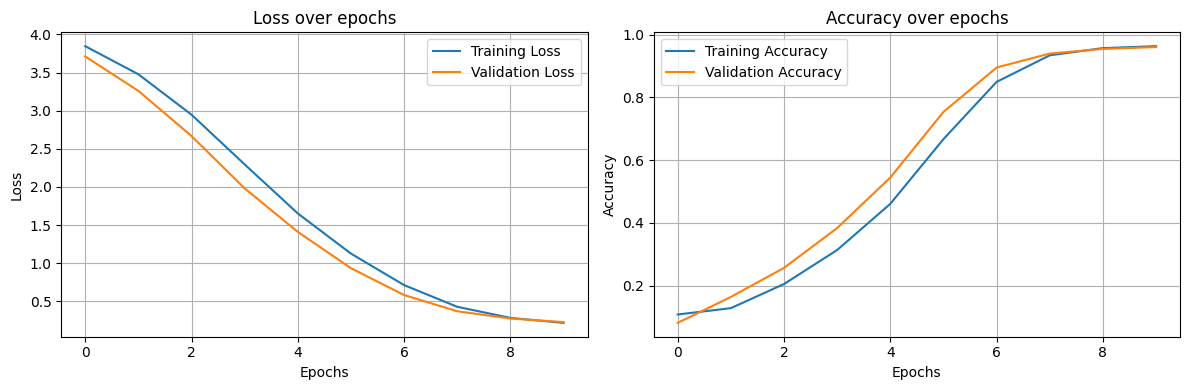

Generated music sequence: [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]


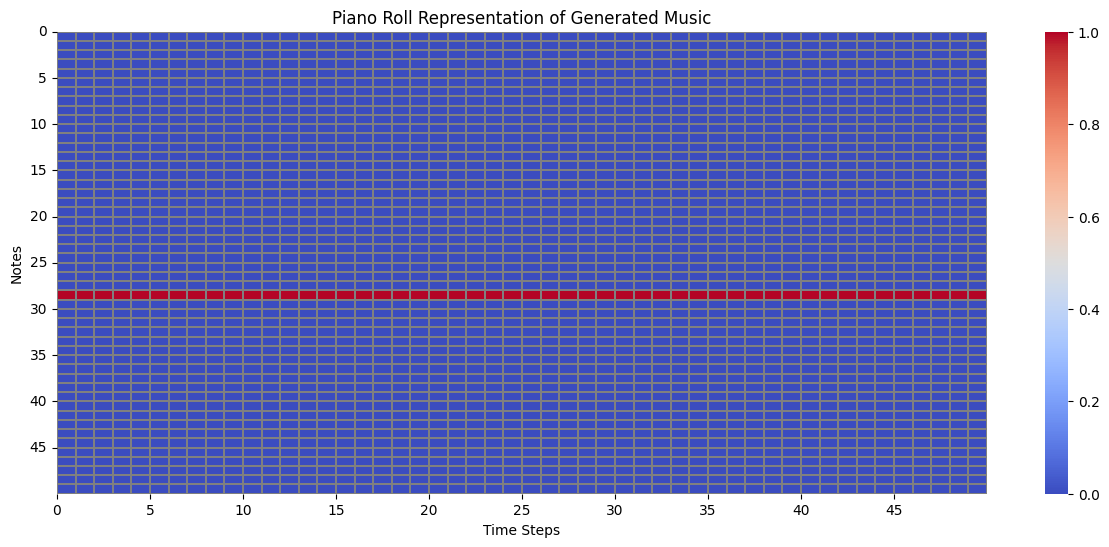

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

notes = 50
sequence = 30
num_seq = 1000

np.random.seed(42)
data = np.random.randint(0, notes, size=(num_seq, sequence))

x_train = data[:, :-1]
y_train = data[:, 1:]

# One hot encoding
x_train = to_categorical(x_train, num_classes=notes)
y_train = to_categorical(y_train, num_classes=notes)

# Build the model
model = models.Sequential()
model.add(layers.Input(shape=(sequence - 1, notes)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.TimeDistributed(layers.Dense(notes, activation='softmax')))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Function to plot loss and accuracy history
def plot_hist(history):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_hist(history)

# Function to generate music using the trained model
def gen_mus(model, start, num_gen=50):
    generated = []
    curr_seq = to_categorical(start, num_classes=notes)  # One-hot encoding the start sequence

    for _ in range(num_gen):
        pred = model.predict(curr_seq, verbose=0)  # Get the model's prediction
        nxt = np.argmax(pred[:, -1, :], axis=-1)  # Get the most likely next note
        generated.append(nxt[0])  # Append the predicted note to the generated list

        # Prepare the new sequence for the next prediction
        nxt_onehot = to_categorical(nxt, num_classes=notes).reshape(1, 1, notes)
        curr_seq = np.concatenate([curr_seq[:, 1:, :], nxt_onehot], axis=1)  # Update the sequence

    return generated

# Generate music starting from a random sequence
start_seq = np.random.randint(0, notes, size=(1, sequence - 1))
generated_music = gen_mus(model, start_seq)

# Function to plot piano roll of the generated music
def plot_piano_roll(generated_music, num_notes):
    piano_roll = np.zeros((num_notes, len(generated_music)))
    for t, note in enumerate(generated_music):
        piano_roll[note, t] = 1

    plt.figure(figsize=(15, 6))
    sns.heatmap(
        piano_roll,
        cmap="coolwarm",
        cbar=True,
        xticklabels=10,
        yticklabels=True,
        linewidths=0.1,
        linecolor='gray'
    )
    plt.title("Piano Roll Representation of Generated Music")
    plt.xlabel("Time Steps")
    plt.ylabel("Notes")
    plt.yticks(ticks=np.arange(0, notes, step=5), labels=np.arange(0, notes, step=5))
    plt.xticks(ticks=np.arange(0, len(generated_music), step=5), labels=np.arange(0, len(generated_music), step=5))
    plt.show()

# Print and plot the generated music sequence
print("Generated music sequence:", generated_music)
plot_piano_roll(generated_music, notes)


# **pgrm 7**
## Using Bidirectional GRU for Sentimental Analysis
### Dropout to overcome unstable Gradient  

In [4]:
#7
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

num_words = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

x_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(X_test, maxlen=maxlen)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model.add(Bidirectional(GRU(64, return_sequences=False)))  # GRU layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=64)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

def decode_review(encoded_review):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i > 2])  # Offset by 3 for padding
    return decoded_review

def predict_sentiment(review):
    word_index = imdb.get_word_index()
    encoded_review = [word_index[word] + 3 for word in review.split() if word in word_index]
    padded_review = pad_sequences([encoded_review], maxlen=maxlen)
    prediction = model.predict(padded_review, verbose=0)  # Disable verbose output
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment

print("\nSample Sentiments:")
for i in range(5):  # Print 5 sample sentiments
    review = decode_review(X_test[i])
    sentiment = predict_sentiment(review)
    print("-" * 50)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 235s 733ms/step - accuracy: 0.6596 - loss: 0.5847 - val_accuracy: 0.8472 - val_loss: 0.3623
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 723ms/step - accuracy: 0.8868 - loss: 0.2855 - val_accuracy: 0.8616 - val_loss: 0.3259
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8578 - loss: 0.3356
Test Accuracy: 85.66%

Sample Sentiments:
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--------------------------------------------------
Review: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
Predicted Sentiment: Negative
--------------------------------------------------
--------------------------------------------------
Review: this film requires a lot of patience because it focuses on

## Using Bidirectional LSTM Model for Sentimental Analysis
### Layer Normalisation to overcome unstable Gradient

In [ ]:
#7
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, GRU, LayerNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# Parameters
num_words = 10000
maxlen = 200

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Padding sequences
x_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(X_test, maxlen=maxlen)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Model with LayerNormalization
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Using LSTM
model.add(LayerNormalization())  # Added LayerNormalization here
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Decode reviews
def decode_review(encoded_review):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i > 2])  # Offset by 3 for padding
    return decoded_review

# Predict sentiment
def predict_sentiment(review):
    word_index = imdb.get_word_index()
    encoded_review = [word_index[word] + 3 for word in review.split() if word in word_index]
    padded_review = pad_sequences([encoded_review], maxlen=maxlen)
    prediction = model.predict(padded_review, verbose=0)  # Disable verbose output
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment

# Sample predictions
print("\nSample Sentiments:")
for i in range(5):  # Print 5 sample sentiments
    review = decode_review(X_test[i])
    sentiment = predict_sentiment(review)
    print("-" * 50)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 185s 577ms/step - accuracy: 0.6973 - loss: 0.5664 - val_accuracy: 0.7294 - val_loss: 0.5271
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 177s 565ms/step - accuracy: 0.8736 - loss: 0.3138 - val_accuracy: 0.8388 - val_loss: 0.3853
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8342 - loss: 0.3987
Test Accuracy: 83.41%

Sample Sentiments:
--------------------------------------------------
Review: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
Predicted Sentiment: Negative
--------------------------------------------------
--------------------------------------------------
Review: this film requires a lot of patience because it focuses on mood and character development the plot is very 